In [30]:
from hmmlearn import hmm
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [16]:
import hmmlearn.hmm as hmm
import numpy as np

In [21]:
states = pd.Series(index=['walk', 'turn', 'stand'], data=[.4, .1, .5])
states

walk     0.4
turn     0.1
stand    0.5
dtype: float64

In [22]:
transitions = pd.DataFrame(index=states.index, columns=states.index, data = [[.6, .2, .2],
                                                                            [.3, .5, .2],
                                                                            [.2, .1, .7]])
transitions

,walk,turn,stand
walk,0.6,0.2,0.2
turn,0.3,0.5,0.2
stand,0.2,0.1,0.7


In [23]:
emissions = pd.DataFrame(index=['high', 'medium', 'small'], columns=transitions.columns, data=[[.9, .1, 0],
                                                                                                [.1, .9, 0],
                                                                                                [0, .1, .9]])
emissions

,walk,turn,stand
high,0.9,0.1,0.0
medium,0.1,0.9,0.0
small,0.0,0.1,0.9


In [24]:
m = hmm.MultinomialHMM(n_components=3)

In [25]:
m.startprob_ = np.array(states.values)

In [26]:
m.transmat_ = np.array(transitions.values)

In [27]:
m.emissionprob_ = np.array(emissions.values)

In [28]:
m.decode(np.array([[1,2,0]]).T)

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


(-5.172566161242476, array([2, 2, 0]))

In [29]:
clean_data = '~/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

In [30]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
import sklearn.cluster as cluster

In [32]:
ts = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 Hz
Sampling rate is 499.6666666666667 Hz


In [33]:
gp = GaitProcessor(sampling_frequency=500, filter_order=4)

In [34]:
r_ts = gp.resample_signal(ts)

In [35]:
fr_ts = gp.filter_data_frame(r_ts, centre=False)

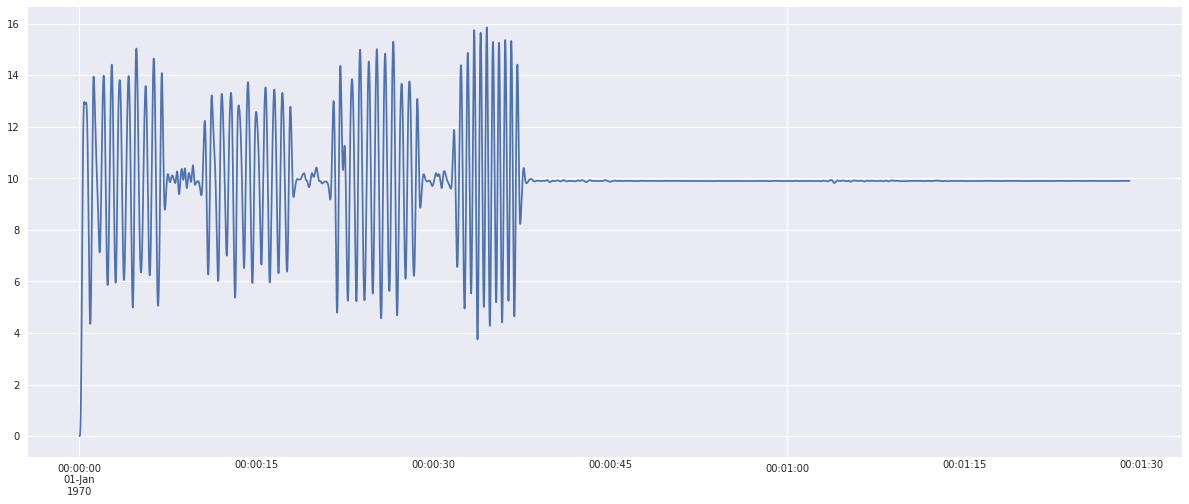

In [36]:
fr_ts.mag_sum_acc.plot()

In [37]:
import scipy.signal as sig
from pdkit.utils import cluster_walk_turn, plot_walk_turn_clusters

In [38]:
d = fr_ts.mag_sum_acc.values

In [39]:
cls, _, _ = cluster_walk_turn(d, window=False)

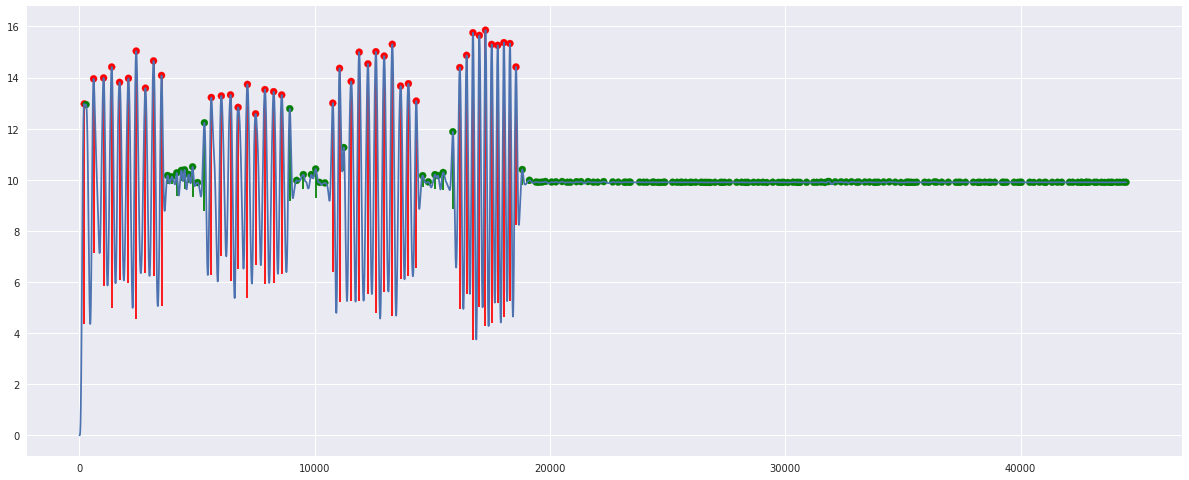

In [40]:
plot_walk_turn_clusters(d, window=False)

In [41]:
cls[64:] = 2

In [42]:
cls

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
m.decode(cls.reshape(-1, 1))

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/hmmlearn/hmm.py:405: RuntimeWarning: divide by zero encountered in log
  return np.log(self.emissionprob_)[:, np.concatenate(X)].T


(-122.36033140483943,
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))